In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('D:\Education\Projects\911\911.csv')

In [143]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Data Wrangling

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [145]:
df.e.value_counts()

1    663522
Name: e, dtype: int64

In [146]:
df.isna().sum()

lat              0
lng              0
desc             0
zip          80199
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [147]:
df.zip.fillna(df.zip.mean(), inplace=True)

In [148]:
df.twp.isna().sum()

293

In [149]:
df['twp'].dropna(axis = 0, inplace=True)

In [150]:
df.isna().sum()

lat            0
lng            0
desc           0
zip            0
title          0
timeStamp      0
twp          293
addr           0
e              0
dtype: int64

In [151]:
df[df.twp == np.NaN]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e


In [152]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.000000,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.000000,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.000000,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.000000,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19236.055791,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [153]:
df.zip = df.zip.astype('int')

In [154]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19236,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


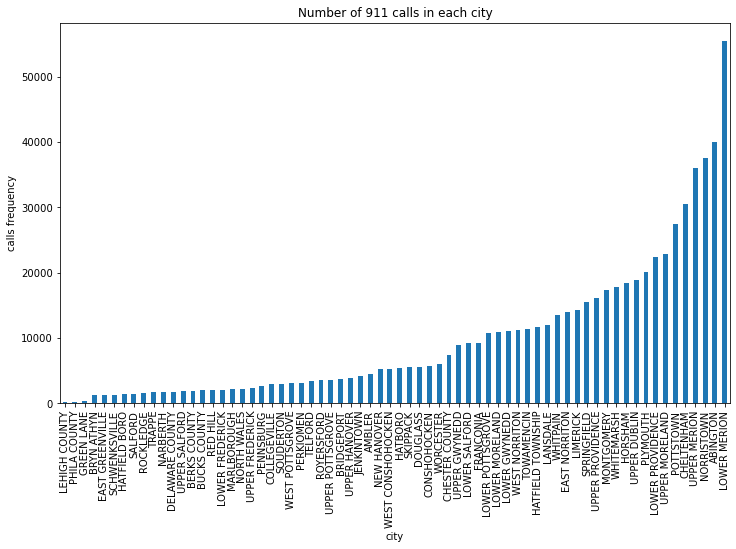

In [155]:
plt.figure(figsize=(12,7))
df.groupby('twp')['e'].sum().sort_values().plot(kind='bar')
plt.xlabel('city')
plt.ylabel('calls frequency')
plt.title('Number of 911 calls in each city');

In [179]:
def date_manupilation(df):
    years = []
    months = []
    dayes = []
    for i in range(len(df.timeStamp)):
        yearsX, monthsX, dayesX = df.timeStamp[i].split('-')
        years.append(yearsX)
        months.append(monthsX)
        dayes.append(dayesX.split()[0])
    return years, months, dayes

In [180]:
years, months, dayes = date_manupilation(df)

In [183]:
df['years'] = years
df['months'] = months
df['days'] = dayes

In [185]:
df.drop('timeStamp', axis = 1 , inplace=True)

In [186]:
df.head()

,lat,lng,desc,zip,title,twp,addr,e,years,months,days
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,2015,12,10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19236,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10


In [217]:
def title_manipulation(df):
    temp = []
    for i in range(len(df.title)):
        temp.append(df.title[i].split(':')[0])
    return temp

In [218]:
df['title_call'] = title_manipulation(df)

In [219]:
df.head()

,lat,lng,desc,zip,title,twp,addr,e,years,months,days,title_call
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,2015,12,10,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19236,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,EMS


<AxesSubplot:xlabel='years'>

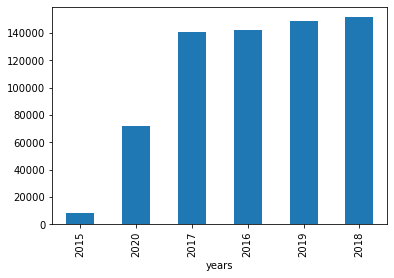

In [203]:
df.groupby('years')['e'].sum().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='title_call'>

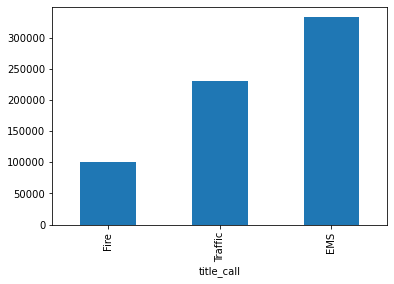

In [224]:
df.groupby('title_call')['e'].sum().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='years,title_call'>

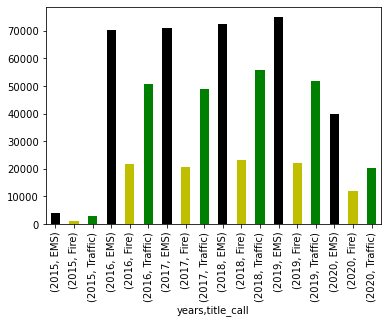

In [238]:
df.groupby(['years', 'title_call'])['e'].sum().plot(kind='bar', color = ['black','y','g'])

<AxesSubplot:xlabel='months'>

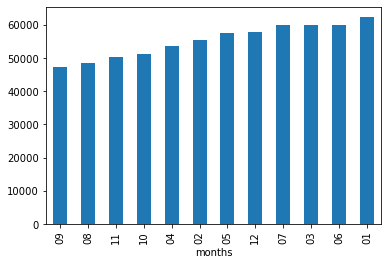

In [202]:
df.groupby('months')['e'].sum().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='months,title_call'>

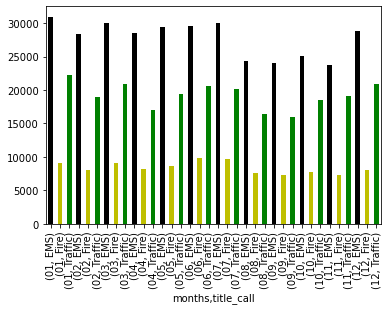

In [239]:
df.groupby(['months', 'title_call'])['e'].sum().plot(kind='bar', color = ['black','y','g'])

<AxesSubplot:xlabel='days'>

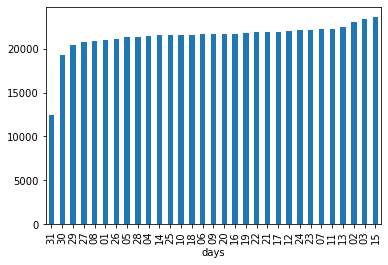

In [209]:
df.groupby('days')['e'].sum().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='years,months,title_call'>

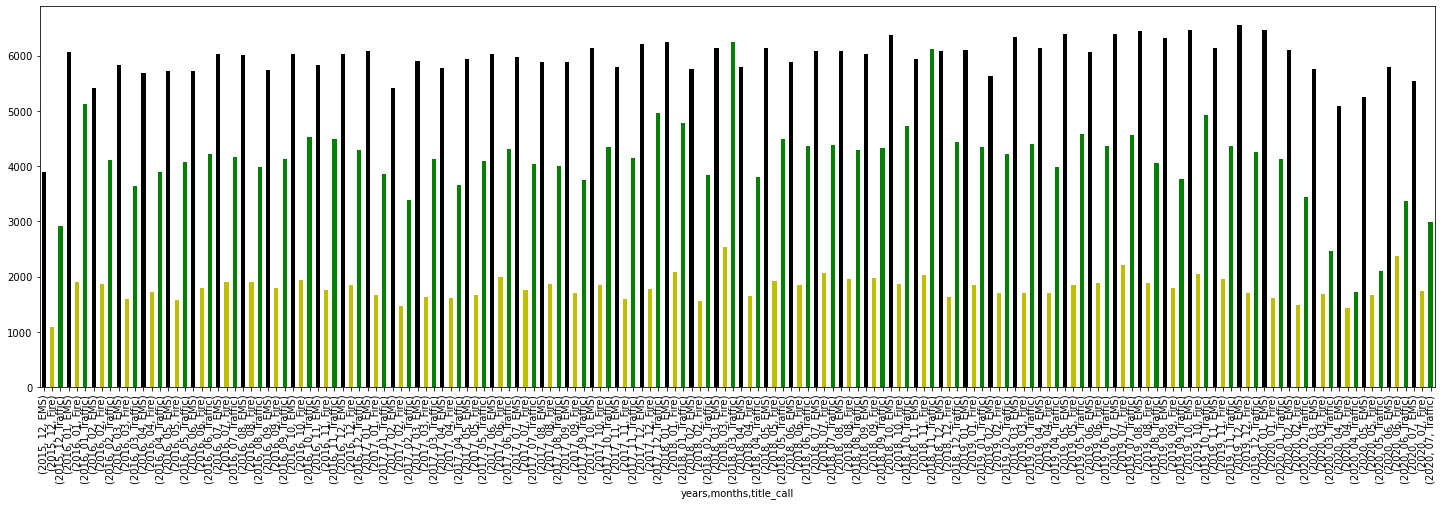

In [244]:
plt.figure(figsize=(25,7))
df.groupby(['years', 'months', 'title_call'])['e'].sum().plot(kind = 'bar',color = ['black','y','g'])

In [246]:
df.head()

,lat,lng,desc,zip,title,twp,addr,e,years,months,days,title_call
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,2015,12,10,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19236,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,EMS


In [248]:
df_new = df.drop(['lat', 'lng', 'desc', 'zip', 'title', 'twp', 'addr', 'e'], axis = 1)

In [249]:
df_new

,years,months,days,title_call
0,2015,12,10,EMS
1,2015,12,10,EMS
2,2015,12,10,Fire
3,2015,12,10,EMS
4,2015,12,10,EMS
...,...,...,...,...
663517,2020,07,29,Traffic
663518,2020,07,29,EMS
663519,2020,07,29,EMS
663520,2020,07,29,Fire


In [ ]:
X = pd.get_dummies(df_new)
y = df_new

# Linear Regression

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression